#Multiple Linear Regression

This is multiple indepedent values, you are calculating one independent value / one line

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


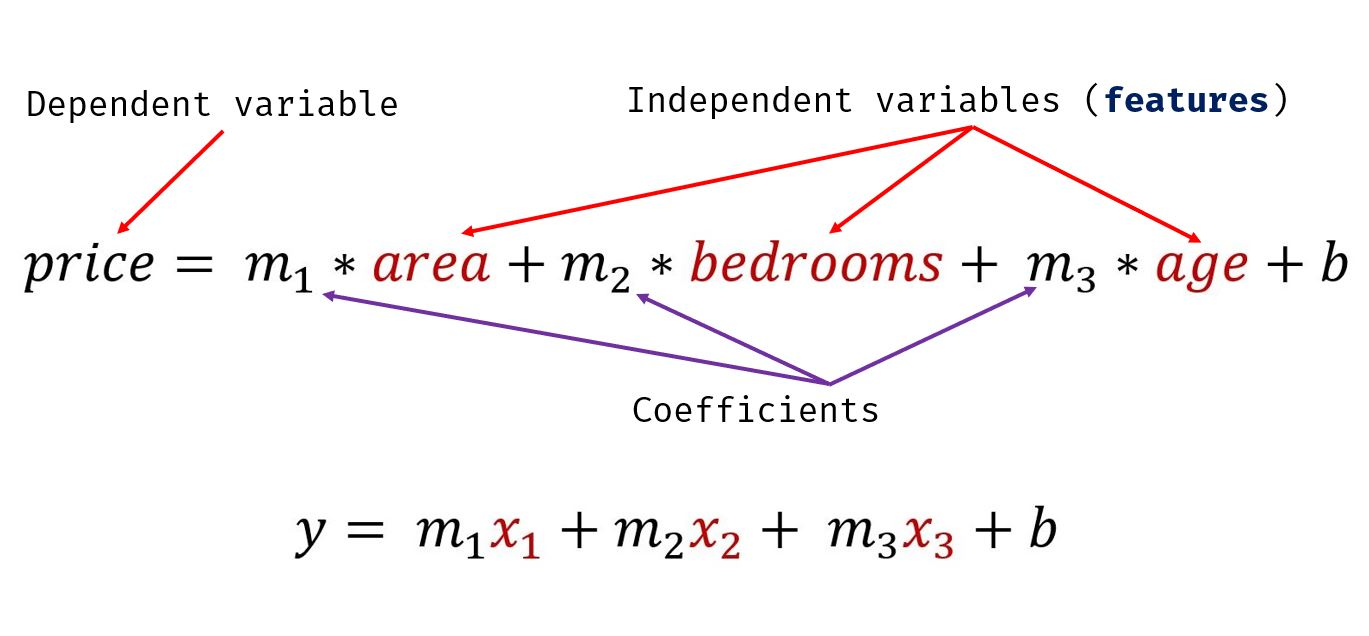

In [3]:
path="/content/homeprices_mlr.csv"

df=pd.read_csv(path)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df["bedrooms"].median()

4.0

In [5]:
df["bedrooms"]= df["bedrooms"].fillna(df["bedrooms"].median())

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
from sklearn import linear_model # this is importing the linear_model class

In [8]:
reg= linear_model.LinearRegression() # we are giving an object to the linear model

In [10]:
reg.fit(df.drop("price", axis= 1), df.price) # we are dropping the dependent column and fitting this to the model

LinearRegression()

In [12]:
reg.coef_ # getting the coef value

array([  112.06244194, 23388.88007794, -3231.71790863])

In [13]:
reg.intercept_ # gettung the intercept

221323.00186540396

In [16]:
reg.predict([[3000,3,40 ]]) #this is preducting the price based on area, rooms and years old of the house

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [19]:
y=(3000* 112.06244194 + 3* 23388.88007794+ 40*-3231.71790863) +221323.00186540396
y

#double checking that this is correct


498408.251574024

In [20]:
reg.predict([[2600,3,20 ]]) #this is not giving an accurate result since the model has not been trained enough

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([518217.63297611])

In [32]:
path="/content/hiring.csv"
df2= pd.read_csv(path)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [45]:
X=df2.iloc[:,:3].values
X

y=df2.iloc[:,3:].values
y

array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]])

In [50]:
from sklearn.impute import SimpleImputer

ex_fre = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
ex_fre.fit(X[:, :1])
X[:, :1] = ex_fre.transform(X[:, :1])
X

array([['eleven', 8.0, 9],
       ['eleven', 8.0, 6],
       ['five', 6.0, 7],
       ['two', 10.0, 10],
       ['seven', 9.0, 6],
       ['three', 7.0, 10],
       ['ten', nan, 7],
       ['eleven', 7.0, 8]], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer

ex_fre = SimpleImputer(missing_values=np.nan, strategy='median')
ex_fre.fit(X[:, 1:2])
X[:, 1:2] = ex_fre.transform(X[:, 1:2])
X

array([['eleven', 8.0, 9.0],
       ['eleven', 8.0, 6.0],
       ['five', 6.0, 7.0],
       ['two', 10.0, 10.0],
       ['seven', 9.0, 6.0],
       ['three', 7.0, 10.0],
       ['ten', 8.0, 7.0],
       ['eleven', 7.0, 8.0]], dtype=object)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 7.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 10.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 9.0, 6.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 7.0, 10.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 8.0, 7.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0]], dtype=object)

In [76]:
X[:,:8]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 9.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 7.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 8.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0]], dtype=object)

In [60]:
from sklearn import linear_model

reg2= linear_model.LinearRegression()

In [82]:
reg2.fit(X[:,:8],y[1])

ValueError: ignored

In [70]:
reg.coef_

array([[  7939.39393939,  -7939.39393939, -65878.78787879,
         40787.87878788,   9454.54545455, -37212.12121212,
         60787.87878788, -31666.66666667,   1666.66666667]])

In [71]:
reg2.intercept_

array([296272.72727273])

In [73]:
reg.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9,6]])
reg.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9,6]])

array([[90000.]])